 Create Chung-Lu and UPA Models

In [3]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from networkx.generators.random_graphs import powerlaw_cluster_graph

# Load the preprocessed email graph
email_graph = nx.read_gml('data/email_graph.gml')

def create_chung_lu_model(graph):
    degree_sequence = [degree for node, degree in graph.degree()]
    chung_lu_model = nx.expected_degree_graph(degree_sequence, selfloops=False)
    return chung_lu_model

def create_upa_model(graph, m):
    num_nodes = graph.number_of_nodes()
    upa_model = powerlaw_cluster_graph(num_nodes, m, p=0.05)
    return upa_model

# Create Chung-Lu and UPA models
chung_lu_model = create_chung_lu_model(email_graph)
upa_model = create_upa_model(email_graph, m=5)

# Save the models for later use
nx.write_gml(chung_lu_model, 'data/chung_lu_model.gml')
nx.write_gml(upa_model, 'data/upa_model.gml')


Compute Resilience for Random Node Removal

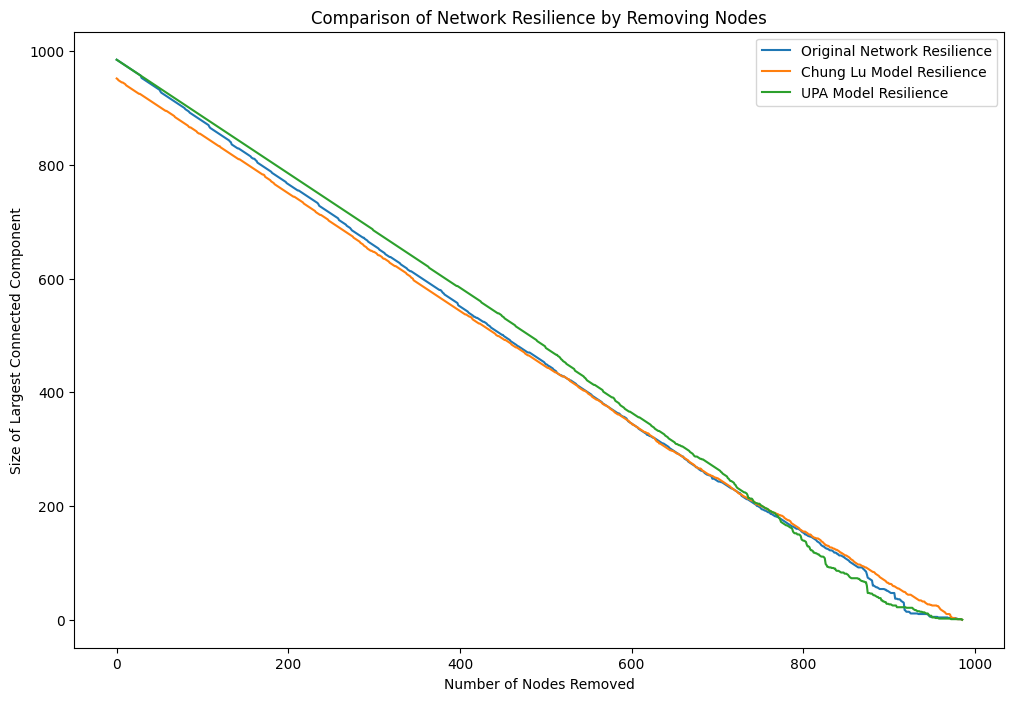

In [4]:
def random_node_removal(graph):
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    largest_cc_size = []
    for node in nodes:
        graph.remove_node(node)
        if nx.number_connected_components(graph) > 0:
            largest_cc = max(nx.connected_components(graph), key=len)
            largest_cc_size.append(len(largest_cc))
        else:
            largest_cc_size.append(0)  # If the graph is completely disconnected
    return largest_cc_size

# Compute resilience for random node removal
resilience_email = random_node_removal(email_graph.copy())
resilience_chung_lu = random_node_removal(chung_lu_model.copy())
resilience_upa = random_node_removal(upa_model.copy())

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(resilience_email, label='Original Network Resilience')
plt.plot(resilience_chung_lu, label='Chung Lu Model Resilience')
plt.plot(resilience_upa, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Removing Nodes')
plt.legend()
plt.show()


 Compute Resilience for Random Node Addition

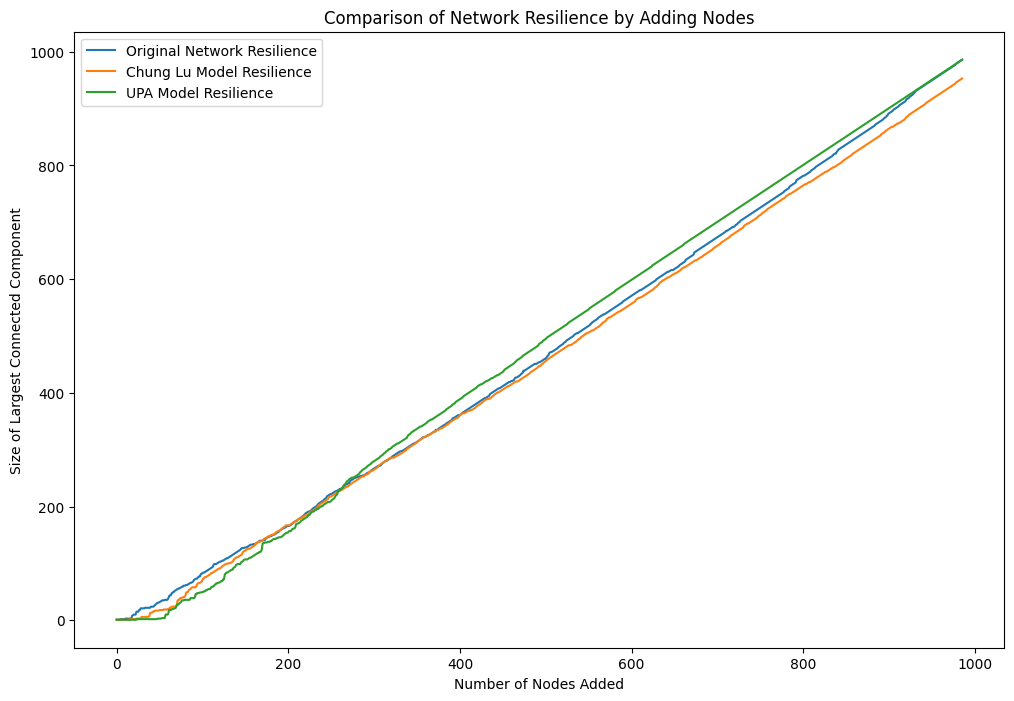

In [5]:
def random_node_addition(graph):
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    added_graph = nx.Graph()
    largest_cc_size = []
    for node in nodes:
        added_graph.add_node(node)
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        if nx.number_connected_components(added_graph) > 0:
            largest_cc = max(nx.connected_components(added_graph), key=len)
            largest_cc_size.append(len(largest_cc))
        else:
            largest_cc_size.append(0)  # If the graph is completely disconnected
    return largest_cc_size

# Compute resilience for random node addition
addition_resilience_email = random_node_addition(email_graph.copy())
addition_resilience_chung_lu = random_node_addition(chung_lu_model.copy())
addition_resilience_upa = random_node_addition(upa_model.copy())

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(addition_resilience_email, label='Original Network Resilience')
plt.plot(addition_resilience_chung_lu, label='Chung Lu Model Resilience')
plt.plot(addition_resilience_upa, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Added')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Adding Nodes')
plt.legend()
plt.show()


Highest Degree Node Removal

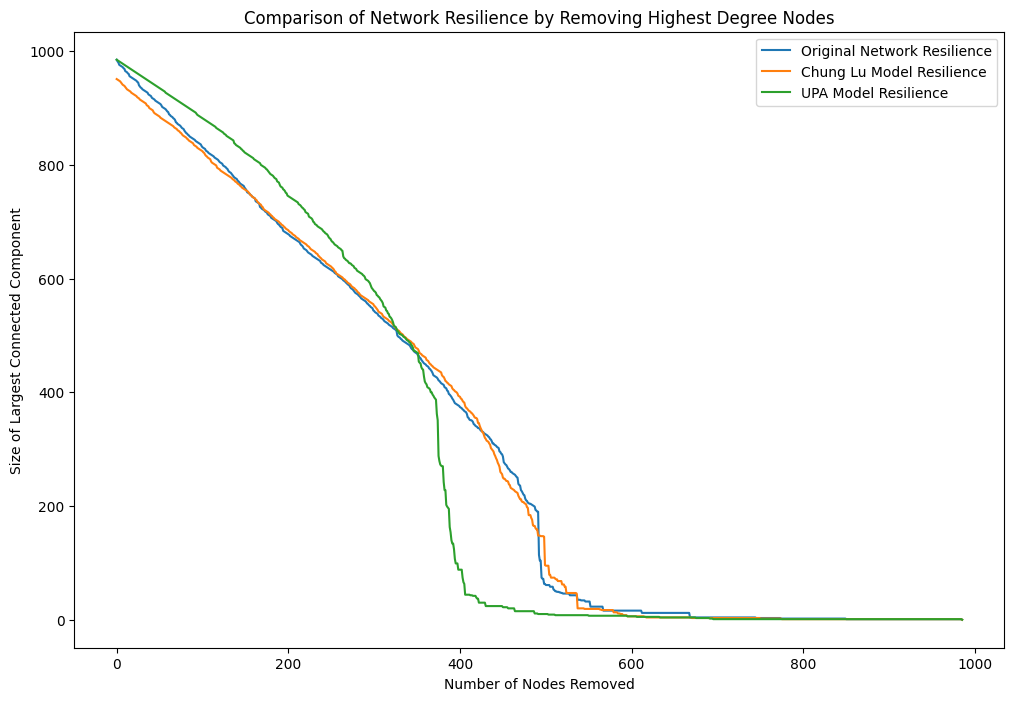

In [6]:
def highest_degree_node_removal(graph):
    nodes_sorted_by_degree = sorted(graph.degree, key=lambda x: x[1], reverse=True)
    largest_cc_size = []
    for node, _ in nodes_sorted_by_degree:
        graph.remove_node(node)
        if nx.number_connected_components(graph) > 0:
            largest_cc = max(nx.connected_components(graph), key=len)
            largest_cc_size.append(len(largest_cc))
        else:
            largest_cc_size.append(0)  # If the graph is completely disconnected
    return largest_cc_size

# Compute resilience for highest degree node removal
highest_degree_resilience_email = highest_degree_node_removal(email_graph.copy())
highest_degree_resilience_chung_lu = highest_degree_node_removal(chung_lu_model.copy())
highest_degree_resilience_upa = highest_degree_node_removal(upa_model.copy())

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(highest_degree_resilience_email, label='Original Network Resilience')
plt.plot(highest_degree_resilience_chung_lu, label='Chung Lu Model Resilience')
plt.plot(highest_degree_resilience_upa, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Removing Highest Degree Nodes')
plt.legend()
plt.show()


Strategic Node Addition (Degree Centrality)

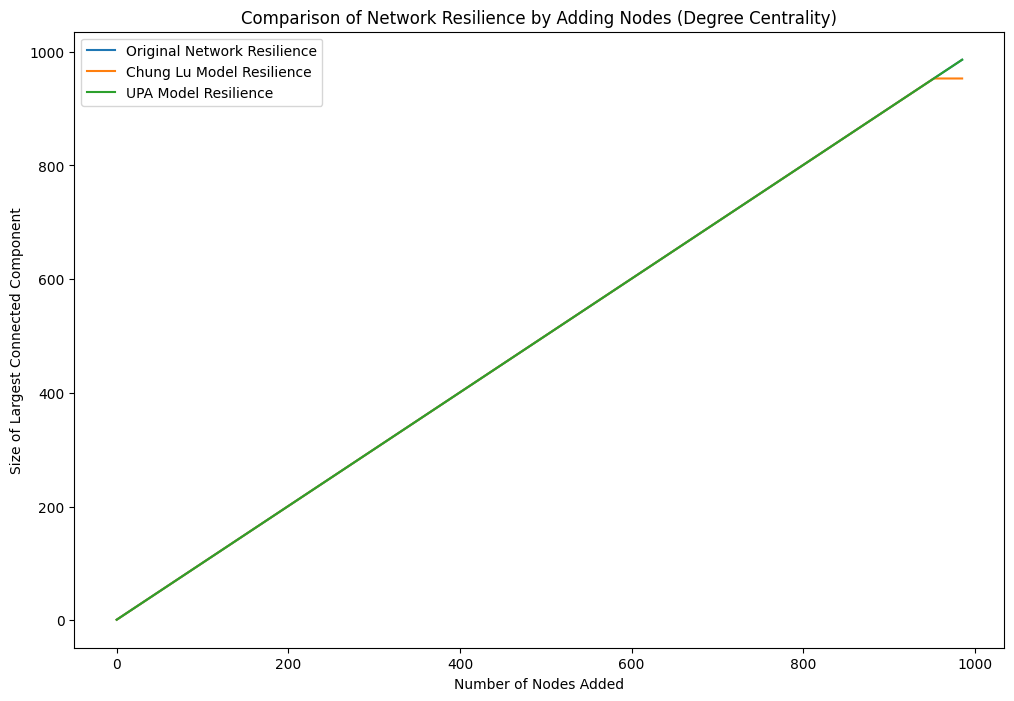

In [11]:
def strategic_node_addition_by_degree(graph):
    nodes_sorted_by_degree = sorted(graph.degree, key=lambda x: x[1], reverse=True)
    added_graph = nx.Graph()
    largest_cc_size = []
    for node, _ in nodes_sorted_by_degree:
        added_graph.add_node(node)
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        if nx.number_connected_components(added_graph) > 0:
            largest_cc = max(nx.connected_components(added_graph), key=len)
            largest_cc_size.append(len(largest_cc))
        else:
            largest_cc_size.append(0)  # If the graph is completely disconnected
    return largest_cc_size

# Compute resilience for strategic node addition by degree
degree_addition_resilience_email = strategic_node_addition_by_degree(email_graph.copy())
degree_addition_resilience_chung_lu = strategic_node_addition_by_degree(chung_lu_model.copy())
degree_addition_resilience_upa = strategic_node_addition_by_degree(upa_model.copy())

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(degree_addition_resilience_email, label='Original Network Resilience')
plt.plot(degree_addition_resilience_chung_lu, label='Chung Lu Model Resilience')
plt.plot(degree_addition_resilience_upa, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Added')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Adding Nodes (Degree Centrality)')
plt.legend()
plt.show()


Strategic Node Addition (Betweenness Centrality)

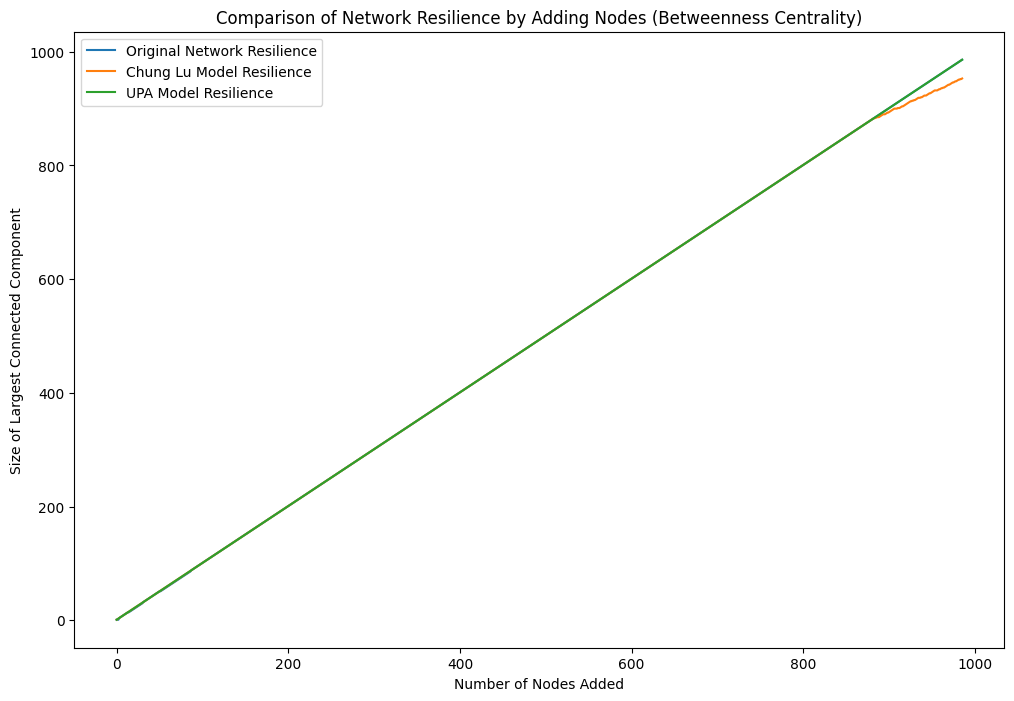

In [8]:
def strategic_node_addition_by_betweenness(graph):
    betweenness_centrality = nx.betweenness_centrality(graph)
    nodes_sorted_by_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    added_graph = nx.Graph()
    largest_cc_size = []
    for node, _ in nodes_sorted_by_betweenness:
        added_graph.add_node(node)
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        if nx.number_connected_components(added_graph) > 0:
            largest_cc = max(nx.connected_components(added_graph), key=len)
            largest_cc_size.append(len(largest_cc))
        else:
            largest_cc_size.append(0)  # If the graph is completely disconnected
    return largest_cc_size

# Compute resilience for strategic node addition by betweenness centrality
betweenness_addition_resilience_email = strategic_node_addition_by_betweenness(email_graph.copy())
betweenness_addition_resilience_chung_lu = strategic_node_addition_by_betweenness(chung_lu_model.copy())
betweenness_addition_resilience_upa = strategic_node_addition_by_betweenness(upa_model.copy())

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(betweenness_addition_resilience_email, label='Original Network Resilience')
plt.plot(betweenness_addition_resilience_chung_lu, label='Chung Lu Model Resilience')
plt.plot(betweenness_addition_resilience_upa, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Added')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Adding Nodes (Betweenness Centrality)')
plt.legend()
plt.show()
